In [76]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.utils import to_categorical
# enlever .legacy pour ceux que sont pas sur mac M1
from keras.optimizers.legacy import Adam
import random
# https://medium.com/@afozbek_/how-to-train-a-model-with-mnist-dataset-d79f8123ba84



import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import math
#https://towardsdatascience.com/going-beyond-99-mnist-handwritten-digits-recognition-cfff96337392

In [2]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

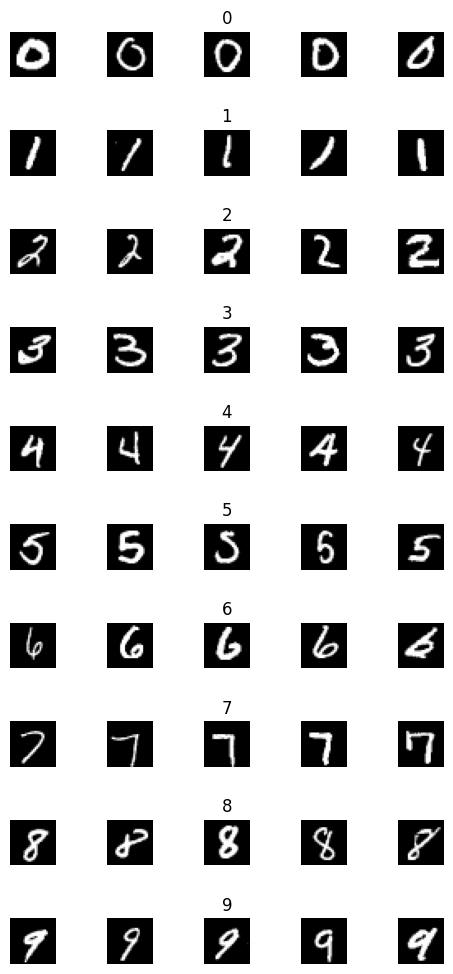

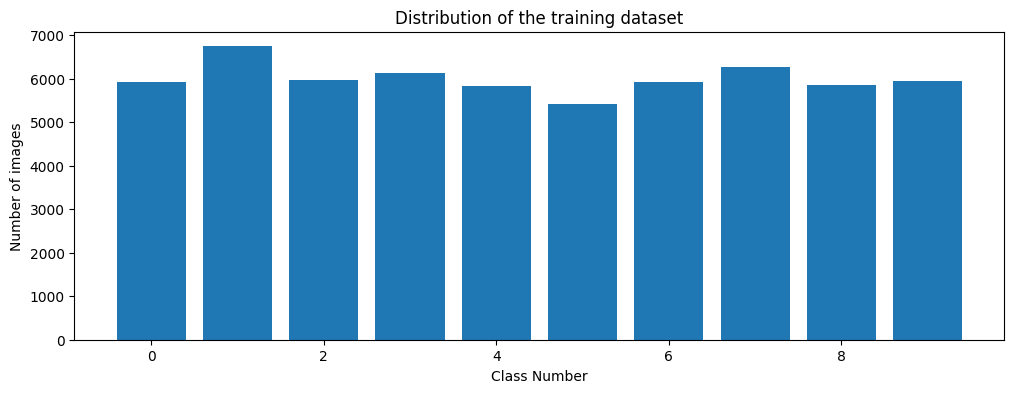

In [5]:
num_of_samples = []

cols = 5 #We will select 5 random images
num_of_classes = 10 #each digit total: 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_of_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),
                                    :, :],
                        cmap=plt.get_cmap('gray')) 
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [7]:
X_train = X_train/255 
X_test = X_test/255
#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],
                         num_pixels)
X_test = X_test.reshape(X_test.shape[0],
                         num_pixels)
print(X_train.shape)


(60000, 784)


In [84]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = num_pixels, #num_pixels: 784
                  activation = 'relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), #lr: learning rate
                loss='categorical_crossentropy', #loss function
               metrics=['accuracy'])
    
    return model


In [85]:
model = create_model()
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 30)                330       
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
Total params: 8600 (33.59 KB)
Trainable params: 8600 (33.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [10]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [86]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 64,  verbose=1, shuffle=1)

Epoch 1/30
  9/938 [..............................] - ETA: 6s - loss: 2.1759 - accuracy: 0.1632  

/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


938/938 [==============================] - 5s 5ms/step - loss: 0.4302 - accuracy: 0.8711
Epoch 2/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2943 - accuracy: 0.9157
Epoch 3/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2740 - accuracy: 0.9209
Epoch 4/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2565 - accuracy: 0.9257
Epoch 5/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2509 - accuracy: 0.9285
Epoch 6/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2437 - accuracy: 0.9309
Epoch 7/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2372 - accuracy: 0.9331
Epoch 8/30
938/938 [==============================] - 5s 6ms/step - loss: 0.2357 - accuracy: 0.9333
Epoch 9/30
938/938 [==============================] - 6s 6ms/step - loss: 0.2308 - accuracy: 0.9343
Epoch 10/30
938/938 [==============================] - 7s 7ms/step - loss: 0.2304 - accuracy: 0.9355
Epoch 11/3

Text(0.5, 0, 'epoch')

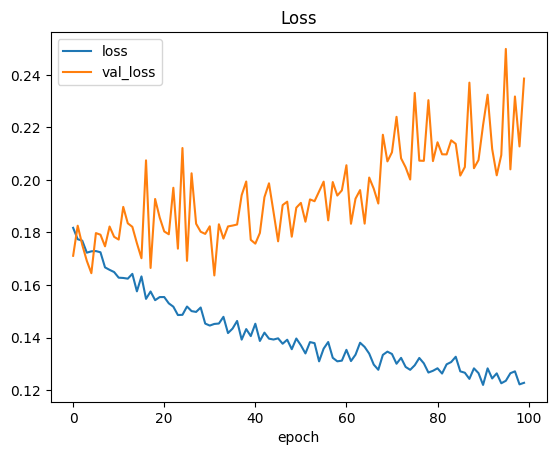

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


In [13]:
import requests
from PIL import Image

In [47]:
img = Image.open("./images/0.jpg")

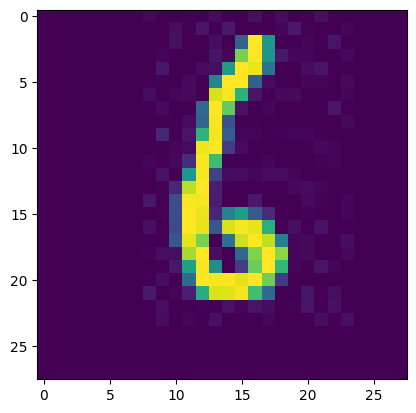

In [48]:
plt.imshow(img)

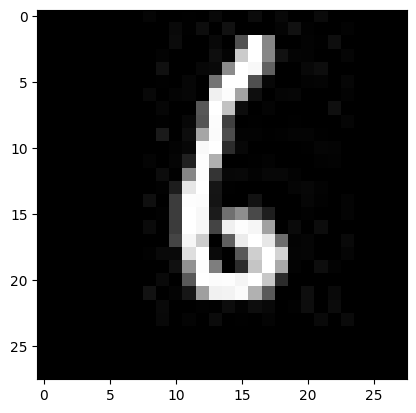

In [67]:
img_array = np.asarray(img)
image = cv2.resize(img_array, (28, 28 ))
#gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) #(28, 28)
# image = cv2.bitwise_not(resized)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [51]:
import cv2

images = [
    cv2.resize(np.asarray(Image.open(f"./images/{i}.jpg")), (28, 28 ))
    for i in range(6536)
]

p = []
for i,image in enumerate(images):
    
    image = image / 255
    image = image.reshape(1, 784)
    prediction = np.argmax(model.predict(image), axis=-1)[0]
    print(i, prediction)
    p.append(prediction)
# print("predicted digit:", str(prediction))
# y_predict = np.argmax(model.predict(x_test), axis=-1)
# print(y_predict)

1/1 [==============================] - 0s 8ms/step
0 6
1/1 [==============================] - 0s 9ms/step
1 5
1/1 [==============================] - 0s 28ms/step
2 8
1/1 [==============================] - 0s 9ms/step
3 0
1/1 [==============================] - 0s 9ms/step
4 6
1/1 [==============================] - 0s 8ms/step
5 1
1/1 [==============================] - 0s 10ms/step
6 6
1/1 [==============================] - 0s 10ms/step
7 5
1/1 [==============================] - 0s 10ms/step
8 6
1/1 [==============================] - 0s 10ms/step
9 3
1/1 [==============================] - 0s 10ms/step
10 4
1/1 [==============================] - 0s 11ms/step
11 1
1/1 [==============================] - 0s 9ms/step
12 2
1/1 [==============================] - 0s 11ms/step
13 1
1/1 [==============================] - 0s 10ms/step
14 0
1/1 [==============================] - 0s 8ms/step
15 4
1/1 [==============================] - 0s 10ms/step
16 2
1/1 [==============================] - 0s 10ms/s

1/1 [==============================] - 0s 8ms/step
145 5
1/1 [==============================] - 0s 9ms/step
146 4
1/1 [==============================] - 0s 9ms/step
147 7
1/1 [==============================] - 0s 8ms/step
148 4
1/1 [==============================] - 0s 8ms/step
149 9
1/1 [==============================] - 0s 8ms/step
150 1
1/1 [==============================] - 0s 8ms/step
151 5
1/1 [==============================] - 0s 9ms/step
152 6
1/1 [==============================] - 0s 9ms/step
153 0
1/1 [==============================] - 0s 8ms/step
154 1
1/1 [==============================] - 0s 9ms/step
155 6
1/1 [==============================] - 0s 8ms/step
156 8
1/1 [==============================] - 0s 8ms/step
157 2
1/1 [==============================] - 0s 8ms/step
158 0
1/1 [==============================] - 0s 8ms/step
159 2
1/1 [==============================] - 0s 9ms/step
160 6
1/1 [==============================] - 0s 9ms/step
161 1
1/1 [==========================

1/1 [==============================] - 0s 9ms/step
288 2
1/1 [==============================] - 0s 8ms/step
289 3
1/1 [==============================] - 0s 8ms/step
290 8
1/1 [==============================] - 0s 8ms/step
291 6
1/1 [==============================] - 0s 9ms/step
292 6
1/1 [==============================] - 0s 9ms/step
293 9
1/1 [==============================] - 0s 8ms/step
294 8
1/1 [==============================] - 0s 8ms/step
295 1
1/1 [==============================] - 0s 8ms/step
296 6
1/1 [==============================] - 0s 8ms/step
297 8
1/1 [==============================] - 0s 9ms/step
298 9
1/1 [==============================] - 0s 8ms/step
299 8
1/1 [==============================] - 0s 8ms/step
300 9
1/1 [==============================] - 0s 8ms/step
301 1
1/1 [==============================] - 0s 9ms/step
302 6
1/1 [==============================] - 0s 9ms/step
303 2
1/1 [==============================] - 0s 8ms/step
304 8
1/1 [==========================

1/1 [==============================] - 0s 8ms/step
431 8
1/1 [==============================] - 0s 8ms/step
432 0
1/1 [==============================] - 0s 9ms/step
433 3
1/1 [==============================] - 0s 9ms/step
434 1
1/1 [==============================] - 0s 8ms/step
435 2
1/1 [==============================] - 0s 8ms/step
436 9
1/1 [==============================] - 0s 8ms/step
437 4
1/1 [==============================] - 0s 9ms/step
438 6
1/1 [==============================] - 0s 8ms/step
439 7
1/1 [==============================] - 0s 8ms/step
440 3
1/1 [==============================] - 0s 8ms/step
441 5
1/1 [==============================] - 0s 9ms/step
442 4
1/1 [==============================] - 0s 9ms/step
443 2
1/1 [==============================] - 0s 8ms/step
444 8
1/1 [==============================] - 0s 8ms/step
445 8
1/1 [==============================] - 0s 9ms/step
446 5
1/1 [==============================] - 0s 9ms/step
447 5
1/1 [==========================

1/1 [==============================] - 0s 7ms/step
574 7
1/1 [==============================] - 0s 8ms/step
575 6
1/1 [==============================] - 0s 8ms/step
576 4
1/1 [==============================] - 0s 9ms/step
577 9
1/1 [==============================] - 0s 9ms/step
578 3
1/1 [==============================] - 0s 8ms/step
579 5
1/1 [==============================] - 0s 8ms/step
580 4
1/1 [==============================] - 0s 9ms/step
581 8
1/1 [==============================] - 0s 9ms/step
582 7
1/1 [==============================] - 0s 8ms/step
583 5
1/1 [==============================] - 0s 8ms/step
584 8
1/1 [==============================] - 0s 9ms/step
585 6
1/1 [==============================] - 0s 10ms/step
586 1
1/1 [==============================] - 0s 8ms/step
587 2
1/1 [==============================] - 0s 8ms/step
588 1
1/1 [==============================] - 0s 9ms/step
589 1
1/1 [==============================] - 0s 9ms/step
590 2
1/1 [=========================

1/1 [==============================] - 0s 8ms/step
717 6
1/1 [==============================] - 0s 8ms/step
718 6
1/1 [==============================] - 0s 8ms/step
719 6
1/1 [==============================] - 0s 8ms/step
720 2
1/1 [==============================] - 0s 8ms/step
721 9
1/1 [==============================] - 0s 8ms/step
722 3
1/1 [==============================] - 0s 8ms/step
723 1
1/1 [==============================] - 0s 8ms/step
724 8
1/1 [==============================] - 0s 8ms/step
725 2
1/1 [==============================] - 0s 8ms/step
726 5
1/1 [==============================] - 0s 8ms/step
727 7
1/1 [==============================] - 0s 8ms/step
728 2
1/1 [==============================] - 0s 8ms/step
729 5
1/1 [==============================] - 0s 8ms/step
730 1
1/1 [==============================] - 0s 8ms/step
731 8
1/1 [==============================] - 0s 10ms/step
732 0
1/1 [==============================] - 0s 8ms/step
733 2
1/1 [=========================

1/1 [==============================] - 0s 8ms/step
860 0
1/1 [==============================] - 0s 8ms/step
861 8
1/1 [==============================] - 0s 8ms/step
862 5
1/1 [==============================] - 0s 8ms/step
863 7
1/1 [==============================] - 0s 8ms/step
864 2
1/1 [==============================] - 0s 8ms/step
865 9
1/1 [==============================] - 0s 8ms/step
866 3
1/1 [==============================] - 0s 8ms/step
867 9
1/1 [==============================] - 0s 8ms/step
868 2
1/1 [==============================] - 0s 8ms/step
869 1
1/1 [==============================] - 0s 8ms/step
870 0
1/1 [==============================] - 0s 8ms/step
871 0
1/1 [==============================] - 0s 8ms/step
872 4
1/1 [==============================] - 0s 8ms/step
873 0
1/1 [==============================] - 0s 8ms/step
874 3
1/1 [==============================] - 0s 8ms/step
875 0
1/1 [==============================] - 0s 8ms/step
876 4
1/1 [==========================

1/1 [==============================] - 0s 8ms/step
1003 6
1/1 [==============================] - 0s 8ms/step
1004 3
1/1 [==============================] - 0s 8ms/step
1005 1
1/1 [==============================] - 0s 8ms/step
1006 3
1/1 [==============================] - 0s 8ms/step
1007 7
1/1 [==============================] - 0s 8ms/step
1008 8
1/1 [==============================] - 0s 7ms/step
1009 1
1/1 [==============================] - 0s 7ms/step
1010 5
1/1 [==============================] - 0s 8ms/step
1011 3
1/1 [==============================] - 0s 8ms/step
1012 4
1/1 [==============================] - 0s 7ms/step
1013 3
1/1 [==============================] - 0s 8ms/step
1014 0
1/1 [==============================] - 0s 7ms/step
1015 7
1/1 [==============================] - 0s 7ms/step
1016 2
1/1 [==============================] - 0s 7ms/step
1017 3
1/1 [==============================] - 0s 7ms/step
1018 5
1/1 [==============================] - 0s 8ms/step
1019 5
1/1 [=========

1/1 [==============================] - 0s 8ms/step
1144 0
1/1 [==============================] - 0s 8ms/step
1145 5
1/1 [==============================] - 0s 10ms/step
1146 1
1/1 [==============================] - 0s 8ms/step
1147 4
1/1 [==============================] - 0s 8ms/step
1148 0
1/1 [==============================] - 0s 8ms/step
1149 8
1/1 [==============================] - 0s 10ms/step
1150 6
1/1 [==============================] - 0s 8ms/step
1151 1
1/1 [==============================] - 0s 8ms/step
1152 2
1/1 [==============================] - 0s 9ms/step
1153 5
1/1 [==============================] - 0s 8ms/step
1154 1
1/1 [==============================] - 0s 8ms/step
1155 3
1/1 [==============================] - 0s 8ms/step
1156 8
1/1 [==============================] - 0s 8ms/step
1157 4
1/1 [==============================] - 0s 8ms/step
1158 3
1/1 [==============================] - 0s 9ms/step
1159 9
1/1 [==============================] - 0s 9ms/step
1160 6
1/1 [=======

1/1 [==============================] - 0s 8ms/step
1285 3
1/1 [==============================] - 0s 8ms/step
1286 4
1/1 [==============================] - 0s 8ms/step
1287 3
1/1 [==============================] - 0s 8ms/step
1288 6
1/1 [==============================] - 0s 8ms/step
1289 3
1/1 [==============================] - 0s 8ms/step
1290 1
1/1 [==============================] - 0s 8ms/step
1291 5
1/1 [==============================] - 0s 8ms/step
1292 6
1/1 [==============================] - 0s 8ms/step
1293 4
1/1 [==============================] - 0s 8ms/step
1294 5
1/1 [==============================] - 0s 7ms/step
1295 3
1/1 [==============================] - 0s 8ms/step
1296 6
1/1 [==============================] - 0s 8ms/step
1297 2
1/1 [==============================] - 0s 8ms/step
1298 7
1/1 [==============================] - 0s 8ms/step
1299 2
1/1 [==============================] - 0s 7ms/step
1300 7
1/1 [==============================] - 0s 7ms/step
1301 7
1/1 [=========

1/1 [==============================] - 0s 8ms/step
1426 3
1/1 [==============================] - 0s 8ms/step
1427 8
1/1 [==============================] - 0s 8ms/step
1428 5
1/1 [==============================] - 0s 8ms/step
1429 3
1/1 [==============================] - 0s 8ms/step
1430 7
1/1 [==============================] - 0s 9ms/step
1431 9
1/1 [==============================] - 0s 8ms/step
1432 2
1/1 [==============================] - 0s 8ms/step
1433 5
1/1 [==============================] - 0s 10ms/step
1434 5
1/1 [==============================] - 0s 8ms/step
1435 2
1/1 [==============================] - 0s 7ms/step
1436 5
1/1 [==============================] - 0s 8ms/step
1437 9
1/1 [==============================] - 0s 8ms/step
1438 8
1/1 [==============================] - 0s 8ms/step
1439 5
1/1 [==============================] - 0s 8ms/step
1440 8
1/1 [==============================] - 0s 8ms/step
1441 1
1/1 [==============================] - 0s 9ms/step
1442 5
1/1 [========

1/1 [==============================] - 0s 8ms/step
1567 3
1/1 [==============================] - 0s 8ms/step
1568 8
1/1 [==============================] - 0s 8ms/step
1569 4
1/1 [==============================] - 0s 8ms/step
1570 5
1/1 [==============================] - 0s 7ms/step
1571 0
1/1 [==============================] - 0s 7ms/step
1572 5
1/1 [==============================] - 0s 7ms/step
1573 7
1/1 [==============================] - 0s 7ms/step
1574 2
1/1 [==============================] - 0s 7ms/step
1575 4
1/1 [==============================] - 0s 7ms/step
1576 0
1/1 [==============================] - 0s 8ms/step
1577 6
1/1 [==============================] - 0s 7ms/step
1578 4
1/1 [==============================] - 0s 8ms/step
1579 4
1/1 [==============================] - 0s 7ms/step
1580 7
1/1 [==============================] - 0s 7ms/step
1581 4
1/1 [==============================] - 0s 7ms/step
1582 5
1/1 [==============================] - 0s 7ms/step
1583 4
1/1 [=========

1/1 [==============================] - 0s 8ms/step
1708 8
1/1 [==============================] - 0s 9ms/step
1709 3
1/1 [==============================] - 0s 8ms/step
1710 7
1/1 [==============================] - 0s 8ms/step
1711 2
1/1 [==============================] - 0s 10ms/step
1712 6
1/1 [==============================] - 0s 9ms/step
1713 9
1/1 [==============================] - 0s 8ms/step
1714 7
1/1 [==============================] - 0s 9ms/step
1715 9
1/1 [==============================] - 0s 8ms/step
1716 1
1/1 [==============================] - 0s 8ms/step
1717 1
1/1 [==============================] - 0s 8ms/step
1718 9
1/1 [==============================] - 0s 10ms/step
1719 3
1/1 [==============================] - 0s 8ms/step
1720 0
1/1 [==============================] - 0s 8ms/step
1721 9
1/1 [==============================] - 0s 8ms/step
1722 7
1/1 [==============================] - 0s 9ms/step
1723 0
1/1 [==============================] - 0s 10ms/step
1724 7
1/1 [======

1/1 [==============================] - 0s 8ms/step
1849 7
1/1 [==============================] - 0s 8ms/step
1850 3
1/1 [==============================] - 0s 8ms/step
1851 6
1/1 [==============================] - 0s 8ms/step
1852 1
1/1 [==============================] - 0s 8ms/step
1853 6
1/1 [==============================] - 0s 7ms/step
1854 7
1/1 [==============================] - 0s 8ms/step
1855 2
1/1 [==============================] - 0s 8ms/step
1856 6
1/1 [==============================] - 0s 8ms/step
1857 1
1/1 [==============================] - 0s 8ms/step
1858 7
1/1 [==============================] - 0s 7ms/step
1859 6
1/1 [==============================] - 0s 7ms/step
1860 9
1/1 [==============================] - 0s 8ms/step
1861 7
1/1 [==============================] - 0s 8ms/step
1862 1
1/1 [==============================] - 0s 8ms/step
1863 1
1/1 [==============================] - 0s 7ms/step
1864 4
1/1 [==============================] - 0s 7ms/step
1865 9
1/1 [=========

1/1 [==============================] - 0s 10ms/step
1990 4
1/1 [==============================] - 0s 9ms/step
1991 4
1/1 [==============================] - 0s 9ms/step
1992 4
1/1 [==============================] - 0s 8ms/step
1993 3
1/1 [==============================] - 0s 7ms/step
1994 7
1/1 [==============================] - 0s 8ms/step
1995 1
1/1 [==============================] - 0s 9ms/step
1996 0
1/1 [==============================] - 0s 8ms/step
1997 7
1/1 [==============================] - 0s 9ms/step
1998 6
1/1 [==============================] - 0s 9ms/step
1999 7
1/1 [==============================] - 0s 8ms/step
2000 8
1/1 [==============================] - 0s 8ms/step
2001 3
1/1 [==============================] - 0s 8ms/step
2002 3
1/1 [==============================] - 0s 8ms/step
2003 2
1/1 [==============================] - 0s 8ms/step
2004 4
1/1 [==============================] - 0s 8ms/step
2005 9
1/1 [==============================] - 0s 8ms/step
2006 6
1/1 [========

1/1 [==============================] - 0s 8ms/step
2131 1
1/1 [==============================] - 0s 8ms/step
2132 7
1/1 [==============================] - 0s 7ms/step
2133 0
1/1 [==============================] - 0s 8ms/step
2134 2
1/1 [==============================] - 0s 8ms/step
2135 6
1/1 [==============================] - 0s 8ms/step
2136 6
1/1 [==============================] - 0s 8ms/step
2137 2
1/1 [==============================] - 0s 8ms/step
2138 1
1/1 [==============================] - 0s 8ms/step
2139 6
1/1 [==============================] - 0s 8ms/step
2140 6
1/1 [==============================] - 0s 8ms/step
2141 4
1/1 [==============================] - 0s 8ms/step
2142 4
1/1 [==============================] - 0s 8ms/step
2143 4
1/1 [==============================] - 0s 7ms/step
2144 4
1/1 [==============================] - 0s 8ms/step
2145 8
1/1 [==============================] - 0s 8ms/step
2146 5
1/1 [==============================] - 0s 8ms/step
2147 0
1/1 [=========

1/1 [==============================] - 0s 8ms/step
2272 2
1/1 [==============================] - 0s 8ms/step
2273 8
1/1 [==============================] - 0s 8ms/step
2274 9
1/1 [==============================] - 0s 8ms/step
2275 8
1/1 [==============================] - 0s 8ms/step
2276 7
1/1 [==============================] - 0s 8ms/step
2277 4
1/1 [==============================] - 0s 7ms/step
2278 6
1/1 [==============================] - 0s 8ms/step
2279 9
1/1 [==============================] - 0s 8ms/step
2280 0
1/1 [==============================] - 0s 8ms/step
2281 1
1/1 [==============================] - 0s 8ms/step
2282 7
1/1 [==============================] - 0s 8ms/step
2283 1
1/1 [==============================] - 0s 8ms/step
2284 6
1/1 [==============================] - 0s 8ms/step
2285 4
1/1 [==============================] - 0s 8ms/step
2286 5
1/1 [==============================] - 0s 7ms/step
2287 4
1/1 [==============================] - 0s 7ms/step
2288 4
1/1 [=========

1/1 [==============================] - 0s 8ms/step
2413 1
1/1 [==============================] - 0s 8ms/step
2414 2
1/1 [==============================] - 0s 8ms/step
2415 3
1/1 [==============================] - 0s 8ms/step
2416 6
1/1 [==============================] - 0s 7ms/step
2417 5
1/1 [==============================] - 0s 7ms/step
2418 3
1/1 [==============================] - 0s 8ms/step
2419 8
1/1 [==============================] - 0s 8ms/step
2420 7
1/1 [==============================] - 0s 8ms/step
2421 2
1/1 [==============================] - 0s 8ms/step
2422 6
1/1 [==============================] - 0s 8ms/step
2423 5
1/1 [==============================] - 0s 8ms/step
2424 5
1/1 [==============================] - 0s 8ms/step
2425 1
1/1 [==============================] - 0s 8ms/step
2426 5
1/1 [==============================] - 0s 8ms/step
2427 4
1/1 [==============================] - 0s 8ms/step
2428 5
1/1 [==============================] - 0s 8ms/step
2429 6
1/1 [=========

1/1 [==============================] - 0s 8ms/step
2554 3
1/1 [==============================] - 0s 9ms/step
2555 4
1/1 [==============================] - 0s 7ms/step
2556 3
1/1 [==============================] - 0s 8ms/step
2557 9
1/1 [==============================] - 0s 8ms/step
2558 5
1/1 [==============================] - 0s 8ms/step
2559 1
1/1 [==============================] - 0s 8ms/step
2560 6
1/1 [==============================] - 0s 8ms/step
2561 5
1/1 [==============================] - 0s 8ms/step
2562 7
1/1 [==============================] - 0s 8ms/step
2563 3
1/1 [==============================] - 0s 9ms/step
2564 4
1/1 [==============================] - 0s 8ms/step
2565 5
1/1 [==============================] - 0s 8ms/step
2566 4
1/1 [==============================] - 0s 10ms/step
2567 3
1/1 [==============================] - 0s 10ms/step
2568 8
1/1 [==============================] - 0s 10ms/step
2569 1
1/1 [==============================] - 0s 9ms/step
2570 9
1/1 [======

1/1 [==============================] - 0s 9ms/step
2695 6
1/1 [==============================] - 0s 9ms/step
2696 0
1/1 [==============================] - 0s 8ms/step
2697 5
1/1 [==============================] - 0s 9ms/step
2698 8
1/1 [==============================] - 0s 9ms/step
2699 5
1/1 [==============================] - 0s 8ms/step
2700 0
1/1 [==============================] - 0s 8ms/step
2701 4
1/1 [==============================] - 0s 8ms/step
2702 2
1/1 [==============================] - 0s 9ms/step
2703 6
1/1 [==============================] - 0s 10ms/step
2704 2
1/1 [==============================] - 0s 8ms/step
2705 7
1/1 [==============================] - 0s 9ms/step
2706 7
1/1 [==============================] - 0s 8ms/step
2707 6
1/1 [==============================] - 0s 8ms/step
2708 7
1/1 [==============================] - 0s 8ms/step
2709 3
1/1 [==============================] - 0s 9ms/step
2710 5
1/1 [==============================] - 0s 9ms/step
2711 3
1/1 [========

1/1 [==============================] - 0s 8ms/step
2836 5
1/1 [==============================] - 0s 8ms/step
2837 1
1/1 [==============================] - 0s 8ms/step
2838 9
1/1 [==============================] - 0s 8ms/step
2839 9
1/1 [==============================] - 0s 8ms/step
2840 8
1/1 [==============================] - 0s 8ms/step
2841 7
1/1 [==============================] - 0s 8ms/step
2842 7
1/1 [==============================] - 0s 8ms/step
2843 8
1/1 [==============================] - 0s 8ms/step
2844 5
1/1 [==============================] - 0s 12ms/step
2845 9
1/1 [==============================] - 0s 12ms/step
2846 5
1/1 [==============================] - 0s 12ms/step
2847 6
1/1 [==============================] - 0s 9ms/step
2848 2
1/1 [==============================] - 0s 10ms/step
2849 2
1/1 [==============================] - 0s 9ms/step
2850 7
1/1 [==============================] - 0s 9ms/step
2851 0
1/1 [==============================] - 0s 11ms/step
2852 0
1/1 [====

2976 6
1/1 [==============================] - 0s 11ms/step
2977 1
1/1 [==============================] - 0s 8ms/step
2978 1
1/1 [==============================] - 0s 8ms/step
2979 5
1/1 [==============================] - 0s 9ms/step
2980 2
1/1 [==============================] - 0s 9ms/step
2981 5
1/1 [==============================] - 0s 8ms/step
2982 8
1/1 [==============================] - 0s 8ms/step
2983 3
1/1 [==============================] - 0s 9ms/step
2984 6
1/1 [==============================] - 0s 9ms/step
2985 9
1/1 [==============================] - 0s 9ms/step
2986 1
1/1 [==============================] - 0s 8ms/step
2987 3
1/1 [==============================] - 0s 8ms/step
2988 4
1/1 [==============================] - 0s 9ms/step
2989 0
1/1 [==============================] - 0s 9ms/step
2990 9
1/1 [==============================] - 0s 8ms/step
2991 7
1/1 [==============================] - 0s 8ms/step
2992 8
1/1 [==============================] - 0s 8ms/step
2993 1
1/1 [=

1/1 [==============================] - 0s 8ms/step
3118 1
1/1 [==============================] - 0s 8ms/step
3119 4
1/1 [==============================] - 0s 8ms/step
3120 6
1/1 [==============================] - 0s 8ms/step
3121 3
1/1 [==============================] - 0s 8ms/step
3122 5
1/1 [==============================] - 0s 7ms/step
3123 1
1/1 [==============================] - 0s 9ms/step
3124 2
1/1 [==============================] - 0s 8ms/step
3125 6
1/1 [==============================] - 0s 8ms/step
3126 7
1/1 [==============================] - 0s 8ms/step
3127 1
1/1 [==============================] - 0s 8ms/step
3128 8
1/1 [==============================] - 0s 8ms/step
3129 4
1/1 [==============================] - 0s 8ms/step
3130 5
1/1 [==============================] - 0s 8ms/step
3131 2
1/1 [==============================] - 0s 7ms/step
3132 9
1/1 [==============================] - 0s 8ms/step
3133 1
1/1 [==============================] - 0s 8ms/step
3134 5
1/1 [=========

1/1 [==============================] - 0s 10ms/step
3258 9
1/1 [==============================] - 0s 10ms/step
3259 8
1/1 [==============================] - 0s 8ms/step
3260 2
1/1 [==============================] - 0s 9ms/step
3261 5
1/1 [==============================] - 0s 7ms/step
3262 2
1/1 [==============================] - 0s 8ms/step
3263 9
1/1 [==============================] - 0s 10ms/step
3264 0
1/1 [==============================] - 0s 8ms/step
3265 4
1/1 [==============================] - 0s 7ms/step
3266 7
1/1 [==============================] - 0s 8ms/step
3267 4
1/1 [==============================] - 0s 8ms/step
3268 2
1/1 [==============================] - 0s 8ms/step
3269 4
1/1 [==============================] - 0s 8ms/step
3270 2
1/1 [==============================] - 0s 8ms/step
3271 8
1/1 [==============================] - 0s 9ms/step
3272 2
1/1 [==============================] - 0s 8ms/step
3273 1
1/1 [==============================] - 0s 8ms/step
3274 7
1/1 [======

1/1 [==============================] - 0s 8ms/step
3399 3
1/1 [==============================] - 0s 8ms/step
3400 8
1/1 [==============================] - 0s 8ms/step
3401 5
1/1 [==============================] - 0s 7ms/step
3402 1
1/1 [==============================] - 0s 8ms/step
3403 3
1/1 [==============================] - 0s 8ms/step
3404 0
1/1 [==============================] - 0s 8ms/step
3405 9
1/1 [==============================] - 0s 7ms/step
3406 4
1/1 [==============================] - 0s 7ms/step
3407 8
1/1 [==============================] - 0s 7ms/step
3408 4
1/1 [==============================] - 0s 8ms/step
3409 2
1/1 [==============================] - 0s 8ms/step
3410 5
1/1 [==============================] - 0s 8ms/step
3411 2
1/1 [==============================] - 0s 7ms/step
3412 4
1/1 [==============================] - 0s 7ms/step
3413 8
1/1 [==============================] - 0s 8ms/step
3414 6
1/1 [==============================] - 0s 8ms/step
3415 8
1/1 [=========

1/1 [==============================] - 0s 11ms/step
3540 5
1/1 [==============================] - 0s 19ms/step
3541 1
1/1 [==============================] - 0s 10ms/step
3542 9
1/1 [==============================] - 0s 11ms/step
3543 6
1/1 [==============================] - 0s 13ms/step
3544 2
1/1 [==============================] - 0s 11ms/step
3545 4
1/1 [==============================] - 0s 9ms/step
3546 2
1/1 [==============================] - 0s 9ms/step
3547 0
1/1 [==============================] - 0s 9ms/step
3548 1
1/1 [==============================] - 0s 8ms/step
3549 4
1/1 [==============================] - 0s 9ms/step
3550 7
1/1 [==============================] - 0s 9ms/step
3551 4
1/1 [==============================] - 0s 9ms/step
3552 0
1/1 [==============================] - 0s 9ms/step
3553 2
1/1 [==============================] - 0s 11ms/step
3554 4
1/1 [==============================] - 0s 9ms/step
3555 2
1/1 [==============================] - 0s 12ms/step
3556 3
1/1 [=

1/1 [==============================] - 0s 8ms/step
3681 7
1/1 [==============================] - 0s 10ms/step
3682 7
1/1 [==============================] - 0s 10ms/step
3683 6
1/1 [==============================] - 0s 11ms/step
3684 0
1/1 [==============================] - 0s 10ms/step
3685 6
1/1 [==============================] - 0s 10ms/step
3686 6
1/1 [==============================] - 0s 10ms/step
3687 1
1/1 [==============================] - 0s 8ms/step
3688 2
1/1 [==============================] - 0s 9ms/step
3689 3
1/1 [==============================] - 0s 16ms/step
3690 7
1/1 [==============================] - 0s 12ms/step
3691 6
1/1 [==============================] - 0s 11ms/step
3692 5
1/1 [==============================] - 0s 11ms/step
3693 5
1/1 [==============================] - 0s 10ms/step
3694 5
1/1 [==============================] - 0s 10ms/step
3695 8
1/1 [==============================] - 0s 8ms/step
3696 2
1/1 [==============================] - 0s 8ms/step
3697 9
1/

1/1 [==============================] - 0s 8ms/step
3822 5
1/1 [==============================] - 0s 10ms/step
3823 2
1/1 [==============================] - 0s 9ms/step
3824 2
1/1 [==============================] - 0s 9ms/step
3825 1
1/1 [==============================] - 0s 8ms/step
3826 5
1/1 [==============================] - 0s 8ms/step
3827 2
1/1 [==============================] - 0s 12ms/step
3828 9
1/1 [==============================] - 0s 11ms/step
3829 7
1/1 [==============================] - 0s 13ms/step
3830 1
1/1 [==============================] - 0s 8ms/step
3831 9
1/1 [==============================] - 0s 8ms/step
3832 6
1/1 [==============================] - 0s 10ms/step
3833 3
1/1 [==============================] - 0s 8ms/step
3834 5
1/1 [==============================] - 0s 9ms/step
3835 0
1/1 [==============================] - 0s 8ms/step
3836 7
1/1 [==============================] - 0s 8ms/step
3837 1
1/1 [==============================] - 0s 8ms/step
3838 9
1/1 [====

1/1 [==============================] - 0s 8ms/step
3963 8
1/1 [==============================] - 0s 8ms/step
3964 4
1/1 [==============================] - 0s 7ms/step
3965 5
1/1 [==============================] - 0s 7ms/step
3966 8
1/1 [==============================] - 0s 8ms/step
3967 1
1/1 [==============================] - 0s 8ms/step
3968 2
1/1 [==============================] - 0s 8ms/step
3969 3
1/1 [==============================] - 0s 8ms/step
3970 5
1/1 [==============================] - 0s 8ms/step
3971 6
1/1 [==============================] - 0s 8ms/step
3972 5
1/1 [==============================] - 0s 8ms/step
3973 7
1/1 [==============================] - 0s 8ms/step
3974 8
1/1 [==============================] - 0s 8ms/step
3975 6
1/1 [==============================] - 0s 9ms/step
3976 2
1/1 [==============================] - 0s 8ms/step
3977 7
1/1 [==============================] - 0s 8ms/step
3978 5
1/1 [==============================] - 0s 8ms/step
3979 6
1/1 [=========

1/1 [==============================] - 0s 9ms/step
4104 2
1/1 [==============================] - 0s 8ms/step
4105 7
1/1 [==============================] - 0s 8ms/step
4106 9
1/1 [==============================] - 0s 8ms/step
4107 7
1/1 [==============================] - 0s 8ms/step
4108 4
1/1 [==============================] - 0s 8ms/step
4109 8
1/1 [==============================] - 0s 8ms/step
4110 3
1/1 [==============================] - 0s 8ms/step
4111 6
1/1 [==============================] - 0s 8ms/step
4112 4
1/1 [==============================] - 0s 8ms/step
4113 3
1/1 [==============================] - 0s 8ms/step
4114 5
1/1 [==============================] - 0s 8ms/step
4115 4
1/1 [==============================] - 0s 8ms/step
4116 6
1/1 [==============================] - 0s 8ms/step
4117 1
1/1 [==============================] - 0s 8ms/step
4118 0
1/1 [==============================] - 0s 9ms/step
4119 3
1/1 [==============================] - 0s 9ms/step
4120 6
1/1 [=========

1/1 [==============================] - 0s 8ms/step
4245 3
1/1 [==============================] - 0s 8ms/step
4246 5
1/1 [==============================] - 0s 8ms/step
4247 8
1/1 [==============================] - 0s 8ms/step
4248 8
1/1 [==============================] - 0s 8ms/step
4249 1
1/1 [==============================] - 0s 8ms/step
4250 4
1/1 [==============================] - 0s 8ms/step
4251 5
1/1 [==============================] - 0s 8ms/step
4252 6
1/1 [==============================] - 0s 8ms/step
4253 0
1/1 [==============================] - 0s 8ms/step
4254 9
1/1 [==============================] - 0s 8ms/step
4255 4
1/1 [==============================] - 0s 8ms/step
4256 6
1/1 [==============================] - 0s 8ms/step
4257 1
1/1 [==============================] - 0s 8ms/step
4258 3
1/1 [==============================] - 0s 8ms/step
4259 8
1/1 [==============================] - 0s 17ms/step
4260 0
1/1 [==============================] - 0s 9ms/step
4261 3
1/1 [========

1/1 [==============================] - 0s 8ms/step
4385 4
1/1 [==============================] - 0s 9ms/step
4386 1
1/1 [==============================] - 0s 8ms/step
4387 6
1/1 [==============================] - 0s 8ms/step
4388 2
1/1 [==============================] - 0s 8ms/step
4389 8
1/1 [==============================] - 0s 8ms/step
4390 8
1/1 [==============================] - 0s 8ms/step
4391 8
1/1 [==============================] - 0s 8ms/step
4392 6
1/1 [==============================] - 0s 8ms/step
4393 5
1/1 [==============================] - 0s 8ms/step
4394 3
1/1 [==============================] - 0s 9ms/step
4395 7
1/1 [==============================] - 0s 9ms/step
4396 4
1/1 [==============================] - 0s 8ms/step
4397 6
1/1 [==============================] - 0s 8ms/step
4398 0
1/1 [==============================] - 0s 10ms/step
4399 2
1/1 [==============================] - 0s 9ms/step
4400 0
1/1 [==============================] - 0s 9ms/step
4401 1
1/1 [========

1/1 [==============================] - 0s 9ms/step
4526 5
1/1 [==============================] - 0s 8ms/step
4527 9
1/1 [==============================] - 0s 9ms/step
4528 6
1/1 [==============================] - 0s 9ms/step
4529 1
1/1 [==============================] - 0s 9ms/step
4530 5
1/1 [==============================] - 0s 8ms/step
4531 4
1/1 [==============================] - 0s 9ms/step
4532 2
1/1 [==============================] - 0s 9ms/step
4533 7
1/1 [==============================] - 0s 8ms/step
4534 3
1/1 [==============================] - 0s 8ms/step
4535 1
1/1 [==============================] - 0s 9ms/step
4536 2
1/1 [==============================] - 0s 8ms/step
4537 3
1/1 [==============================] - 0s 8ms/step
4538 5
1/1 [==============================] - 0s 8ms/step
4539 8
1/1 [==============================] - 0s 9ms/step
4540 9
1/1 [==============================] - 0s 9ms/step
4541 0
1/1 [==============================] - 0s 8ms/step
4542 2
1/1 [=========

1/1 [==============================] - 0s 8ms/step
4667 3
1/1 [==============================] - 0s 9ms/step
4668 8
1/1 [==============================] - 0s 8ms/step
4669 8
1/1 [==============================] - 0s 8ms/step
4670 9
1/1 [==============================] - 0s 7ms/step
4671 2
1/1 [==============================] - 0s 8ms/step
4672 8
1/1 [==============================] - 0s 8ms/step
4673 5
1/1 [==============================] - 0s 8ms/step
4674 1
1/1 [==============================] - 0s 8ms/step
4675 4
1/1 [==============================] - 0s 8ms/step
4676 9
1/1 [==============================] - 0s 8ms/step
4677 2
1/1 [==============================] - 0s 8ms/step
4678 6
1/1 [==============================] - 0s 8ms/step
4679 7
1/1 [==============================] - 0s 8ms/step
4680 2
1/1 [==============================] - 0s 8ms/step
4681 7
1/1 [==============================] - 0s 8ms/step
4682 7
1/1 [==============================] - 0s 9ms/step
4683 4
1/1 [=========

1/1 [==============================] - 0s 8ms/step
4808 8
1/1 [==============================] - 0s 8ms/step
4809 6
1/1 [==============================] - 0s 7ms/step
4810 5
1/1 [==============================] - 0s 8ms/step
4811 0
1/1 [==============================] - 0s 8ms/step
4812 6
1/1 [==============================] - 0s 8ms/step
4813 8
1/1 [==============================] - 0s 8ms/step
4814 0
1/1 [==============================] - 0s 8ms/step
4815 2
1/1 [==============================] - 0s 8ms/step
4816 4
1/1 [==============================] - 0s 8ms/step
4817 5
1/1 [==============================] - 0s 8ms/step
4818 3
1/1 [==============================] - 0s 8ms/step
4819 0
1/1 [==============================] - 0s 8ms/step
4820 3
1/1 [==============================] - 0s 8ms/step
4821 9
1/1 [==============================] - 0s 8ms/step
4822 6
1/1 [==============================] - 0s 8ms/step
4823 8
1/1 [==============================] - 0s 8ms/step
4824 2
1/1 [=========

1/1 [==============================] - 0s 8ms/step
4949 5
1/1 [==============================] - 0s 8ms/step
4950 4
1/1 [==============================] - 0s 8ms/step
4951 3
1/1 [==============================] - 0s 8ms/step
4952 2
1/1 [==============================] - 0s 8ms/step
4953 9
1/1 [==============================] - 0s 8ms/step
4954 7
1/1 [==============================] - 0s 7ms/step
4955 1
1/1 [==============================] - 0s 8ms/step
4956 0
1/1 [==============================] - 0s 8ms/step
4957 0
1/1 [==============================] - 0s 8ms/step
4958 5
1/1 [==============================] - 0s 8ms/step
4959 6
1/1 [==============================] - 0s 8ms/step
4960 6
1/1 [==============================] - 0s 8ms/step
4961 6
1/1 [==============================] - 0s 7ms/step
4962 1
1/1 [==============================] - 0s 7ms/step
4963 0
1/1 [==============================] - 0s 7ms/step
4964 2
1/1 [==============================] - 0s 7ms/step
4965 6
1/1 [=========

1/1 [==============================] - 0s 8ms/step
5090 8
1/1 [==============================] - 0s 8ms/step
5091 5
1/1 [==============================] - 0s 8ms/step
5092 0
1/1 [==============================] - 0s 8ms/step
5093 0
1/1 [==============================] - 0s 8ms/step
5094 9
1/1 [==============================] - 0s 8ms/step
5095 2
1/1 [==============================] - 0s 8ms/step
5096 8
1/1 [==============================] - 0s 8ms/step
5097 3
1/1 [==============================] - 0s 8ms/step
5098 5
1/1 [==============================] - 0s 8ms/step
5099 2
1/1 [==============================] - 0s 7ms/step
5100 6
1/1 [==============================] - 0s 8ms/step
5101 3
1/1 [==============================] - 0s 8ms/step
5102 8
1/1 [==============================] - 0s 8ms/step
5103 5
1/1 [==============================] - 0s 7ms/step
5104 6
1/1 [==============================] - 0s 9ms/step
5105 6
1/1 [==============================] - 0s 8ms/step
5106 3
1/1 [=========

1/1 [==============================] - 0s 8ms/step
5231 6
1/1 [==============================] - 0s 8ms/step
5232 0
1/1 [==============================] - 0s 8ms/step
5233 9
1/1 [==============================] - 0s 8ms/step
5234 9
1/1 [==============================] - 0s 8ms/step
5235 1
1/1 [==============================] - 0s 8ms/step
5236 0
1/1 [==============================] - 0s 8ms/step
5237 1
1/1 [==============================] - 0s 8ms/step
5238 4
1/1 [==============================] - 0s 8ms/step
5239 1
1/1 [==============================] - 0s 8ms/step
5240 0
1/1 [==============================] - 0s 8ms/step
5241 3
1/1 [==============================] - 0s 8ms/step
5242 3
1/1 [==============================] - 0s 8ms/step
5243 3
1/1 [==============================] - 0s 8ms/step
5244 0
1/1 [==============================] - 0s 8ms/step
5245 2
1/1 [==============================] - 0s 8ms/step
5246 1
1/1 [==============================] - 0s 8ms/step
5247 9
1/1 [=========

1/1 [==============================] - 0s 8ms/step
5372 3
1/1 [==============================] - 0s 8ms/step
5373 2
1/1 [==============================] - 0s 10ms/step
5374 2
1/1 [==============================] - 0s 8ms/step
5375 1
1/1 [==============================] - 0s 8ms/step
5376 0
1/1 [==============================] - 0s 7ms/step
5377 9
1/1 [==============================] - 0s 8ms/step
5378 3
1/1 [==============================] - 0s 7ms/step
5379 1
1/1 [==============================] - 0s 8ms/step
5380 2
1/1 [==============================] - 0s 8ms/step
5381 0
1/1 [==============================] - 0s 9ms/step
5382 0
1/1 [==============================] - 0s 7ms/step
5383 2
1/1 [==============================] - 0s 7ms/step
5384 4
1/1 [==============================] - 0s 8ms/step
5385 1
1/1 [==============================] - 0s 8ms/step
5386 5
1/1 [==============================] - 0s 8ms/step
5387 8
1/1 [==============================] - 0s 9ms/step
5388 9
1/1 [========

5512 4
1/1 [==============================] - 0s 8ms/step
5513 5
1/1 [==============================] - 0s 8ms/step
5514 3
1/1 [==============================] - 0s 8ms/step
5515 3
1/1 [==============================] - 0s 8ms/step
5516 6
1/1 [==============================] - 0s 8ms/step
5517 4
1/1 [==============================] - 0s 8ms/step
5518 3
1/1 [==============================] - 0s 8ms/step
5519 1
1/1 [==============================] - 0s 8ms/step
5520 4
1/1 [==============================] - 0s 8ms/step
5521 1
1/1 [==============================] - 0s 8ms/step
5522 6
1/1 [==============================] - 0s 8ms/step
5523 7
1/1 [==============================] - 0s 8ms/step
5524 6
1/1 [==============================] - 0s 8ms/step
5525 1
1/1 [==============================] - 0s 7ms/step
5526 6
1/1 [==============================] - 0s 7ms/step
5527 9
1/1 [==============================] - 0s 7ms/step
5528 2
1/1 [==============================] - 0s 7ms/step
5529 7
1/1 [==

1/1 [==============================] - 0s 8ms/step
5654 2
1/1 [==============================] - 0s 8ms/step
5655 0
1/1 [==============================] - 0s 9ms/step
5656 4
1/1 [==============================] - 0s 8ms/step
5657 6
1/1 [==============================] - 0s 8ms/step
5658 1
1/1 [==============================] - 0s 8ms/step
5659 1
1/1 [==============================] - 0s 8ms/step
5660 2
1/1 [==============================] - 0s 8ms/step
5661 0
1/1 [==============================] - 0s 9ms/step
5662 6
1/1 [==============================] - 0s 8ms/step
5663 8
1/1 [==============================] - 0s 8ms/step
5664 2
1/1 [==============================] - 0s 10ms/step
5665 6
1/1 [==============================] - 0s 8ms/step
5666 3
1/1 [==============================] - 0s 8ms/step
5667 9
1/1 [==============================] - 0s 8ms/step
5668 0
1/1 [==============================] - 0s 7ms/step
5669 3
1/1 [==============================] - 0s 9ms/step
5670 6
1/1 [========

1/1 [==============================] - 0s 8ms/step
5795 8
1/1 [==============================] - 0s 9ms/step
5796 2
1/1 [==============================] - 0s 8ms/step
5797 5
1/1 [==============================] - 0s 8ms/step
5798 0
1/1 [==============================] - 0s 8ms/step
5799 9
1/1 [==============================] - 0s 8ms/step
5800 0
1/1 [==============================] - 0s 8ms/step
5801 3
1/1 [==============================] - 0s 8ms/step
5802 2
1/1 [==============================] - 0s 8ms/step
5803 1
1/1 [==============================] - 0s 8ms/step
5804 3
1/1 [==============================] - 0s 8ms/step
5805 8
1/1 [==============================] - 0s 8ms/step
5806 7
1/1 [==============================] - 0s 8ms/step
5807 3
1/1 [==============================] - 0s 8ms/step
5808 0
1/1 [==============================] - 0s 8ms/step
5809 9
1/1 [==============================] - 0s 8ms/step
5810 1
1/1 [==============================] - 0s 8ms/step
5811 3
1/1 [=========

1/1 [==============================] - 0s 8ms/step
5936 0
1/1 [==============================] - 0s 8ms/step
5937 0
1/1 [==============================] - 0s 8ms/step
5938 9
1/1 [==============================] - 0s 8ms/step
5939 1
1/1 [==============================] - 0s 8ms/step
5940 8
1/1 [==============================] - 0s 8ms/step
5941 2
1/1 [==============================] - 0s 8ms/step
5942 5
1/1 [==============================] - 0s 8ms/step
5943 9
1/1 [==============================] - 0s 8ms/step
5944 4
1/1 [==============================] - 0s 8ms/step
5945 5
1/1 [==============================] - 0s 8ms/step
5946 5
1/1 [==============================] - 0s 8ms/step
5947 8
1/1 [==============================] - 0s 8ms/step
5948 9
1/1 [==============================] - 0s 8ms/step
5949 1
1/1 [==============================] - 0s 8ms/step
5950 4
1/1 [==============================] - 0s 8ms/step
5951 9
1/1 [==============================] - 0s 7ms/step
5952 0
1/1 [=========

1/1 [==============================] - 0s 8ms/step
6077 4
1/1 [==============================] - 0s 8ms/step
6078 4
1/1 [==============================] - 0s 8ms/step
6079 6
1/1 [==============================] - 0s 8ms/step
6080 0
1/1 [==============================] - 0s 8ms/step
6081 7
1/1 [==============================] - 0s 8ms/step
6082 1
1/1 [==============================] - 0s 8ms/step
6083 0
1/1 [==============================] - 0s 7ms/step
6084 1
1/1 [==============================] - 0s 8ms/step
6085 1
1/1 [==============================] - 0s 8ms/step
6086 5
1/1 [==============================] - 0s 8ms/step
6087 1
1/1 [==============================] - 0s 8ms/step
6088 2
1/1 [==============================] - 0s 8ms/step
6089 3
1/1 [==============================] - 0s 8ms/step
6090 3
1/1 [==============================] - 0s 7ms/step
6091 3
1/1 [==============================] - 0s 8ms/step
6092 4
1/1 [==============================] - 0s 8ms/step
6093 0
1/1 [=========

1/1 [==============================] - 0s 8ms/step
6218 7
1/1 [==============================] - 0s 8ms/step
6219 3
1/1 [==============================] - 0s 8ms/step
6220 2
1/1 [==============================] - 0s 7ms/step
6221 4
1/1 [==============================] - 0s 7ms/step
6222 3
1/1 [==============================] - 0s 8ms/step
6223 4
1/1 [==============================] - 0s 8ms/step
6224 9
1/1 [==============================] - 0s 8ms/step
6225 5
1/1 [==============================] - 0s 8ms/step
6226 3
1/1 [==============================] - 0s 8ms/step
6227 7
1/1 [==============================] - 0s 8ms/step
6228 8
1/1 [==============================] - 0s 8ms/step
6229 1
1/1 [==============================] - 0s 7ms/step
6230 2
1/1 [==============================] - 0s 8ms/step
6231 6
1/1 [==============================] - 0s 7ms/step
6232 4
1/1 [==============================] - 0s 7ms/step
6233 2
1/1 [==============================] - 0s 7ms/step
6234 7
1/1 [=========

1/1 [==============================] - 0s 8ms/step
6359 6
1/1 [==============================] - 0s 8ms/step
6360 8
1/1 [==============================] - 0s 8ms/step
6361 1
1/1 [==============================] - 0s 8ms/step
6362 1
1/1 [==============================] - 0s 8ms/step
6363 9
1/1 [==============================] - 0s 8ms/step
6364 2
1/1 [==============================] - 0s 8ms/step
6365 7
1/1 [==============================] - 0s 8ms/step
6366 8
1/1 [==============================] - 0s 7ms/step
6367 5
1/1 [==============================] - 0s 7ms/step
6368 0
1/1 [==============================] - 0s 8ms/step
6369 7
1/1 [==============================] - 0s 7ms/step
6370 7
1/1 [==============================] - 0s 8ms/step
6371 0
1/1 [==============================] - 0s 8ms/step
6372 2
1/1 [==============================] - 0s 8ms/step
6373 5
1/1 [==============================] - 0s 7ms/step
6374 8
1/1 [==============================] - 0s 7ms/step
6375 3
1/1 [=========

1/1 [==============================] - 0s 8ms/step
6500 1
1/1 [==============================] - 0s 8ms/step
6501 5
1/1 [==============================] - 0s 8ms/step
6502 6
1/1 [==============================] - 0s 8ms/step
6503 4
1/1 [==============================] - 0s 8ms/step
6504 8
1/1 [==============================] - 0s 8ms/step
6505 5
1/1 [==============================] - 0s 8ms/step
6506 1
1/1 [==============================] - 0s 7ms/step
6507 0
1/1 [==============================] - 0s 8ms/step
6508 3
1/1 [==============================] - 0s 8ms/step
6509 9
1/1 [==============================] - 0s 8ms/step
6510 0
1/1 [==============================] - 0s 8ms/step
6511 7
1/1 [==============================] - 0s 8ms/step
6512 8
1/1 [==============================] - 0s 8ms/step
6513 3
1/1 [==============================] - 0s 8ms/step
6514 5
1/1 [==============================] - 0s 8ms/step
6515 5
1/1 [==============================] - 0s 8ms/step
6516 2
1/1 [=========

In [52]:
p

[6,
 5,
 8,
 0,
 6,
 1,
 6,
 5,
 6,
 3,
 4,
 1,
 2,
 1,
 0,
 4,
 2,
 8,
 7,
 1,
 9,
 6,
 3,
 0,
 0,
 1,
 9,
 6,
 4,
 5,
 0,
 7,
 8,
 6,
 7,
 0,
 0,
 8,
 4,
 2,
 6,
 1,
 5,
 9,
 4,
 4,
 2,
 8,
 0,
 9,
 9,
 0,
 8,
 4,
 4,
 1,
 0,
 3,
 5,
 8,
 9,
 2,
 4,
 5,
 6,
 5,
 9,
 9,
 8,
 4,
 1,
 2,
 0,
 2,
 1,
 0,
 6,
 2,
 8,
 4,
 4,
 3,
 9,
 0,
 3,
 7,
 5,
 1,
 8,
 5,
 3,
 7,
 2,
 1,
 6,
 3,
 2,
 0,
 1,
 0,
 2,
 6,
 2,
 2,
 2,
 5,
 9,
 8,
 5,
 1,
 7,
 4,
 4,
 1,
 7,
 6,
 4,
 3,
 0,
 9,
 4,
 2,
 3,
 6,
 0,
 6,
 4,
 0,
 0,
 3,
 1,
 7,
 6,
 6,
 4,
 8,
 8,
 9,
 3,
 6,
 6,
 8,
 0,
 5,
 6,
 5,
 4,
 7,
 4,
 9,
 1,
 5,
 6,
 0,
 1,
 6,
 8,
 2,
 0,
 2,
 6,
 1,
 1,
 6,
 1,
 9,
 6,
 8,
 8,
 9,
 5,
 8,
 2,
 5,
 8,
 1,
 4,
 5,
 5,
 1,
 2,
 7,
 0,
 0,
 2,
 3,
 3,
 1,
 8,
 3,
 4,
 2,
 0,
 7,
 3,
 9,
 2,
 6,
 1,
 2,
 2,
 5,
 3,
 0,
 6,
 7,
 0,
 5,
 2,
 4,
 8,
 4,
 1,
 2,
 9,
 0,
 6,
 6,
 6,
 6,
 5,
 8,
 3,
 4,
 0,
 7,
 0,
 4,
 1,
 9,
 8,
 2,
 5,
 3,
 5,
 4,
 0,
 1,
 5,
 6,
 7,
 6,
 6,
 0,
 0,
 8,
 2,
 6,
 2,
 8,


In [53]:
# Être pair ou ne pas l'être.

In [54]:
pair_or_not = [str(i%2) for i in p]

In [55]:
string = "".join(pair_or_not)

In [56]:
len(string) % 8, string

(0,
 '0100010101010100001110100110010100100000011100000110000101101001011100100010000001101111011101010010000001101110011001010010000001110000011000010101011100100000011011000110010101110100011101000111001001100101000010100000101001001100111001101000000000011001001010000110111101101101011011010100010100101100001000000110010001101111011011100111010000100000011011000110000100100000011101100111100101100101001010000110010111101110011101000110100111000011101010000111001001100101000010100100010101111011011001000010000001101100011001010010000000111001001101100010000001100001011011100111001100101101000010101100010001101111011100100111010000100000011011000110010100100000001100110000110000110011001000010110010001100101001100000111001101100001001000000110001101100001011100100111001001101001110001111010100101110010011001010010110000001010010000110010011101100101011100110111010000100000011010100111010101111011111101000110010100100000001100110011000000101000011000010110111001110011001011100110000101

In [57]:
string2 = [string[i:i+8] for i in range(0, len(string), 8)]

In [58]:
string2

['01000101',
 '01010100',
 '00111010',
 '01100101',
 '00100000',
 '01110000',
 '01100001',
 '01101001',
 '01110010',
 '00100000',
 '01101111',
 '01110101',
 '00100000',
 '01101110',
 '01100101',
 '00100000',
 '01110000',
 '01100001',
 '01010111',
 '00100000',
 '01101100',
 '01100101',
 '01110100',
 '01110100',
 '01110010',
 '01100101',
 '00001010',
 '00001010',
 '01001100',
 '11100110',
 '10000000',
 '00011001',
 '00101000',
 '01101111',
 '01101101',
 '01101101',
 '01000101',
 '00101100',
 '00100000',
 '01100100',
 '01101111',
 '01101110',
 '01110100',
 '00100000',
 '01101100',
 '01100001',
 '00100000',
 '01110110',
 '01111001',
 '01100101',
 '00101000',
 '01100101',
 '11101110',
 '01110100',
 '01101001',
 '11000011',
 '10101000',
 '01110010',
 '01100101',
 '00001010',
 '01000101',
 '01111011',
 '01100100',
 '00100000',
 '01101100',
 '01100101',
 '00100000',
 '00111001',
 '00110110',
 '00100000',
 '01100001',
 '01101110',
 '01110011',
 '00101101',
 '00001010',
 '11000100',
 '01101111',

In [59]:
string3 = [int(s,2) for s in string2]

In [60]:
string3

[69,
 84,
 58,
 101,
 32,
 112,
 97,
 105,
 114,
 32,
 111,
 117,
 32,
 110,
 101,
 32,
 112,
 97,
 87,
 32,
 108,
 101,
 116,
 116,
 114,
 101,
 10,
 10,
 76,
 230,
 128,
 25,
 40,
 111,
 109,
 109,
 69,
 44,
 32,
 100,
 111,
 110,
 116,
 32,
 108,
 97,
 32,
 118,
 121,
 101,
 40,
 101,
 238,
 116,
 105,
 195,
 168,
 114,
 101,
 10,
 69,
 123,
 100,
 32,
 108,
 101,
 32,
 57,
 54,
 32,
 97,
 110,
 115,
 45,
 10,
 196,
 111,
 114,
 116,
 32,
 108,
 101,
 32,
 51,
 12,
 51,
 33,
 100,
 101,
 48,
 115,
 97,
 32,
 99,
 97,
 114,
 114,
 105,
 199,
 169,
 114,
 101,
 44,
 10,
 67,
 39,
 101,
 115,
 116,
 32,
 106,
 117,
 123,
 244,
 101,
 32,
 51,
 48,
 40,
 97,
 110,
 115,
 46,
 97,
 106,
 111,
 117,
 116,
 111,
 110,
 115,
 32,
 112,
 79,
 117,
 114,
 32,
 109,
 97,
 108,
 101,
 101,
 105,
 97,
 115,
 44,
 10,
 80,
 126,
 111,
 99,
 232,
 114,
 44,
 32,
 118,
 111,
 121,
 65,
 103,
 101,
 115,
 44,
 32,
 97,
 99,
 115,
 105,
 100,
 229,
 110,
 116,
 243,
 10,
 65,
 117,
 32,
 109,
 111,
 

In [98]:
string4 = ["["+str(i)+"],"+chr(s)+","+f"{bin(s)[2:]:>08}" for i,s in enumerate(string3)]

In [99]:
string4

['[0],E,01000101',
 '[1],T,01010100',
 '[2],:,00111010',
 '[3],e,01100101',
 '[4], ,00100000',
 '[5],p,01110000',
 '[6],a,01100001',
 '[7],i,01101001',
 '[8],r,01110010',
 '[9], ,00100000',
 '[10],o,01101111',
 '[11],u,01110101',
 '[12], ,00100000',
 '[13],n,01101110',
 '[14],e,01100101',
 '[15], ,00100000',
 '[16],p,01110000',
 '[17],a,01100001',
 '[18],W,01010111',
 '[19], ,00100000',
 '[20],l,01101100',
 '[21],e,01100101',
 '[22],t,01110100',
 '[23],t,01110100',
 '[24],r,01110010',
 '[25],e,01100101',
 '[26],\n,00001010',
 '[27],\n,00001010',
 '[28],L,01001100',
 '[29],æ,11100110',
 '[30],\x80,10000000',
 '[31],\x19,00011001',
 '[32],(,00101000',
 '[33],o,01101111',
 '[34],m,01101101',
 '[35],m,01101101',
 '[36],E,01000101',
 '[37],,,00101100',
 '[38], ,00100000',
 '[39],d,01100100',
 '[40],o,01101111',
 '[41],n,01101110',
 '[42],t,01110100',
 '[43], ,00100000',
 '[44],l,01101100',
 '[45],a,01100001',
 '[46], ,00100000',
 '[47],v,01110110',
 '[48],y,01111001',
 '[49],e,01100101',
 '

In [101]:
"".join([chr(s) for i,s in enumerate(string3)])

'ET:e pair ou ne paW lettre\n\nLæ\x80\x19(ommE, dont la vye(eîtiÃ¨re\nE{d le 96 ans-\nÄort le 3\x0c3!de0sa carriÇ©re,\nC\'est ju{ôe 30(ans.ajoutons pOur maleeias,\nP~ocèr, voyAges, acsidåntó\nAu momns 1/4 du la vie,\nC\'est encove 2 æ\x7fis 12 ans.\x02\nPar jour 2 hetres d\'éTudes\nOu de traváux %"foL|\x008 anó,\nNm)rs chaerins, ilquiétåees\nPour ld double"voot 16!als.Pour affaizes qu\'on xrojgtto\n5/2-deuseL - encoje!2 ans.\n5o4 l\'jeure{ de tï)mette\x08Barbe et caetera - ?`ans.\n\nPaR jour pour manger e4!boire\n2 font bieN@8 ans*\nGela pobte le íémoIre\nJ}squ\'ð 95$ans.Reste!un#orm$1 an pour!gaire\nCa au7giseaux font au prifTEmps.\nP`r jour lghomme0a$donc sur 4erre\n1/4 d5heuRe de bnN`demps.\x1aZusta assez 0our déposur le drqpeau sUr le 404CTÆ!: \n404CTF{l3_L4_p0#S1e[qU3laU3_P3u_C0nT3mp0r4jn3}\n\n\x10oème orifinal : Le quarô d\'heuRe de bon uemps Nacolas Boélmqu '

In [93]:
713*8+8

5712